### Main libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Multivariable Random Forest

In [ ]:
price3 = pd.read_csv('agrodata.csv')
price3.head()

,Date,Price
0,02/01/2020,74
1,03/01/2020,81
2,04/01/2020,77
3,07/01/2020,73
4,08/01/2020,67


In [ ]:
price3['Date'] = price3['Date'].astype(str)

In [ ]:
price3['Date'] = pd.to_datetime(price3['Date'], format = "%d/%m/%Y")

In [ ]:
price3.head()

,Date,Price
0,2020-01-02,74
1,2020-01-03,81
2,2020-01-04,77
3,2020-01-07,73
4,2020-01-08,67


In [ ]:
price3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    988 non-null    datetime64[ns]
 1   Price   988 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 15.6 KB


In [ ]:
weather3 = pd.read_csv('agroweather_data.csv')
weather3.head()

,Unnamed: 0,fecha,dia,tempMedia,tempMax,horMinTempMax,tempMin,horMinTempMin,humedadMedia,humedadMax,...,velViento,dirViento,velVientoMax,horMinVelMax,dirVientoVelMax,radiacion,precipitacion,bateria,fechaUtlMod,et0
0,0,2020-01-01,1,11.28,16.30,13:26,8.07,06:28,76.80,88.3,...,1.742,346.500,4.606,02:20,347.600,10.990,0.0,12.88,2020-01-03T07:45:00.000+0100,1.343917
1,1,2020-01-02,2,12.19,15.32,12:32,10.39,17:56,75.70,85.6,...,1.473,359.600,3.998,05:23,0.000,7.060,0.0,12.87,2020-01-04T07:45:00.000+0100,1.199930
2,2,2020-01-03,3,11.77,16.18,13:36,7.94,06:58,77.80,86.8,...,2.111,326.300,4.302,03:35,337.000,9.860,0.0,12.86,2020-01-05T07:45:00.000+0100,1.397516
3,3,2020-01-04,4,12.79,16.79,11:40,9.00,04:20,72.60,86.2,...,1.699,40.730,4.439,01:56,0.095,6.104,0.0,12.87,2020-01-06T07:45:00.000+0100,1.374706
4,4,2020-01-05,5,11.85,17.18,11:36,8.60,00:00,69.21,82.5,...,1.863,4.554,5.184,06:27,326.400,11.050,0.0,12.85,2020-01-07T07:45:00.000+0100,1.695512


In [ ]:
weather3.drop(['Unnamed: 0', 'bateria', 'fechaUtlMod', 'et0'], axis = 1, inplace =True)
weather3.head()

,fecha,dia,tempMedia,tempMax,horMinTempMax,tempMin,horMinTempMin,humedadMedia,humedadMax,horMinHumMax,humedadMin,horMinHumMin,velViento,dirViento,velVientoMax,horMinVelMax,dirVientoVelMax,radiacion,precipitacion
0,2020-01-01,1,11.28,16.30,13:26,8.07,06:28,76.80,88.3,19:04,61.53,10:42,1.742,346.500,4.606,02:20,347.600,10.990,0.0
1,2020-01-02,2,12.19,15.32,12:32,10.39,17:56,75.70,85.6,18:30,62.73,12:30,1.473,359.600,3.998,05:23,0.000,7.060,0.0
2,2020-01-03,3,11.77,16.18,13:36,7.94,06:58,77.80,86.8,20:26,64.39,12:38,2.111,326.300,4.302,03:35,337.000,9.860,0.0
3,2020-01-04,4,12.79,16.79,11:40,9.00,04:20,72.60,86.2,04:26,58.06,11:32,1.699,40.730,4.439,01:56,0.095,6.104,0.0
4,2020-01-05,5,11.85,17.18,11:36,8.60,00:00,69.21,82.5,18:16,49.78,11:30,1.863,4.554,5.184,06:27,326.400,11.050,0.0


In [ ]:
weather3['fecha'] = pd.to_datetime(weather['fecha'])
weather3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   fecha            1505 non-null   datetime64[ns]
 1   dia              1505 non-null   int64         
 2   tempMedia        1505 non-null   float64       
 3   tempMax          1505 non-null   float64       
 4   horMinTempMax    1505 non-null   object        
 5   tempMin          1505 non-null   float64       
 6   horMinTempMin    1505 non-null   object        
 7   humedadMedia     1505 non-null   float64       
 8   humedadMax       1505 non-null   float64       
 9   horMinHumMax     1505 non-null   object        
 10  humedadMin       1505 non-null   float64       
 11  horMinHumMin     1505 non-null   object        
 12  velViento        1505 non-null   float64       
 13  dirViento        1505 non-null   float64       
 14  velVientoMax     1505 non-null   float64

In [ ]:
weather3.describe()

,fecha,dia,tempMedia,tempMax,tempMin,humedadMedia,humedadMax,humedadMin,velViento,dirViento,velVientoMax,dirVientoVelMax,radiacion,precipitacion
count,1505,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000
mean,2022-01-22 00:00:00,178.429236,18.653235,22.989236,14.926671,66.754332,84.181595,46.388957,1.532124,222.250582,5.375778,207.248139,17.604991,0.547447
min,2020-01-01 00:00:00,1.000000,8.360000,10.800000,4.808000,24.140000,43.590000,7.880000,0.367000,0.142000,1.715000,0.000000,0.931000,0.000000
25%,2021-01-11 00:00:00,84.000000,14.640000,18.990000,10.930000,60.670000,79.900000,37.630000,0.974000,158.400000,3.900000,145.800000,11.930000,0.000000
50%,2022-01-22 00:00:00,178.000000,17.820000,22.250000,14.130000,68.040000,84.700000,46.160000,1.326000,255.200000,4.851000,243.800000,17.170000,0.000000
75%,2023-02-02 00:00:00,272.000000,22.550000,26.950000,18.930000,73.500000,90.700000,55.290000,1.807000,301.100000,6.262000,266.000000,23.930000,0.000000
max,2024-02-13 00:00:00,366.000000,29.290000,38.010000,25.570000,99.600000,100.000000,95.200000,7.050000,360.000000,15.340000,354.700000,29.760000,49.200000
std,NaN,107.410009,4.843304,4.876072,4.872473,10.343487,9.586960,12.199913,0.852002,103.309082,2.124141,101.192443,6.849749,2.952161


In [ ]:
final2 = price3.merge(weather3, how = 'inner', left_on = 'Date', right_on = 'fecha')
final2.head()

,Date,Price,fecha,dia,tempMedia,tempMax,horMinTempMax,tempMin,horMinTempMin,humedadMedia,...,horMinHumMax,humedadMin,horMinHumMin,velViento,dirViento,velVientoMax,horMinVelMax,dirVientoVelMax,radiacion,precipitacion
0,2020-01-02,74,2020-01-02,2,12.19,15.32,12:32,10.390,17:56,75.7,...,18:30,62.73,12:30,1.473,359.600,3.998,05:23,0.000,7.060,0.0
1,2020-01-03,81,2020-01-03,3,11.77,16.18,13:36,7.940,06:58,77.8,...,20:26,64.39,12:38,2.111,326.300,4.302,03:35,337.000,9.860,0.0
2,2020-01-04,77,2020-01-04,4,12.79,16.79,11:40,9.000,04:20,72.6,...,04:26,58.06,11:32,1.699,40.730,4.439,01:56,0.095,6.104,0.0
3,2020-01-07,73,2020-01-07,7,10.82,16.17,13:32,6.878,06:50,71.7,...,20:34,48.00,09:38,1.550,340.400,4.449,03:38,0.095,11.280,0.0
4,2020-01-08,67,2020-01-08,8,11.36,16.24,12:46,7.280,06:08,74.0,...,19:24,57.02,09:40,1.056,0.142,3.508,08:29,354.700,10.830,0.0


In [ ]:
final2['Date'] = final2['Date'].astype(str)

In [ ]:
final2['Dia'] = final2['Date'].str.split('-').str[2]
final2['Mes'] = final2['Date'].str.split('-').str[1]
final2['Año'] = final2['Date'].str.split('-').str[0]

In [ ]:
final2.drop(['Date', 'fecha'], axis = 1, inplace = True)
final2.head()

,Price,dia,tempMedia,tempMax,horMinTempMax,tempMin,horMinTempMin,humedadMedia,humedadMax,horMinHumMax,...,velViento,dirViento,velVientoMax,horMinVelMax,dirVientoVelMax,radiacion,precipitacion,Dia,Mes,Año
0,74,2,12.19,15.32,12:32,10.390,17:56,75.7,85.6,18:30,...,1.473,359.600,3.998,05:23,0.000,7.060,0.0,02,01,2020
1,81,3,11.77,16.18,13:36,7.940,06:58,77.8,86.8,20:26,...,2.111,326.300,4.302,03:35,337.000,9.860,0.0,03,01,2020
2,77,4,12.79,16.79,11:40,9.000,04:20,72.6,86.2,04:26,...,1.699,40.730,4.439,01:56,0.095,6.104,0.0,04,01,2020
3,73,7,10.82,16.17,13:32,6.878,06:50,71.7,86.9,20:34,...,1.550,340.400,4.449,03:38,0.095,11.280,0.0,07,01,2020
4,67,8,11.36,16.24,12:46,7.280,06:08,74.0,90.0,19:24,...,1.056,0.142,3.508,08:29,354.700,10.830,0.0,08,01,2020


In [ ]:
def custom_round(time_str):
    # Asegurarse de que time_str es una cadena
    time_str = str(time_str)
    
    # Verificar si time_str contiene ':'
    if ':' in time_str:
        # Dividir en horas y minutos
        hour, minute = map(int, time_str.split(':'))
    else:
        # Si no contiene ':', asumir que es solo una hora
        hour = int(time_str)
        minute = 0  # No hay minutos especificados
    
    # Redondear la hora basándose en el valor de los minutos
    return hour + (minute >= 30)

In [ ]:
final2.isnull().sum()

Price              0
dia                0
tempMedia          0
tempMax            0
horMinTempMax      0
tempMin            0
horMinTempMin      0
humedadMedia       0
humedadMax         0
horMinHumMax       0
humedadMin         0
horMinHumMin       0
velViento          0
dirViento          0
velVientoMax       0
horMinVelMax       0
dirVientoVelMax    0
radiacion          0
precipitacion      0
Dia                0
Mes                0
Año                0
dtype: int64

In [ ]:
final2['horMinTempMax'] = final2['horMinTempMax'].astype(str).apply(custom_round)
final2['horMinTempMin'] = final2['horMinTempMin'].astype(str).apply(custom_round)
final2['horMinHumMin'] = final2['horMinHumMin'].astype(str).apply(custom_round)
final2['horMinVelMax'] = final2['horMinVelMax'].astype(str).apply(custom_round)
final2['horMinVelMax'] = final2['horMinVelMax'].astype(str).apply(custom_round)
final2['horMinHumMax'] = final2['horMinHumMax'].astype(str).apply(custom_round)

In [ ]:
final2.drop(['Dia', 'Mes', 'Año'], axis = 1, inplace =True)
final2.head()

,Price,dia,tempMedia,tempMax,horMinTempMax,tempMin,horMinTempMin,humedadMedia,humedadMax,horMinHumMax,humedadMin,horMinHumMin,velViento,dirViento,velVientoMax,horMinVelMax,dirVientoVelMax,radiacion,precipitacion
0,74,2,12.19,15.32,13,10.390,18,75.7,85.6,19,62.73,13,1.473,359.600,3.998,5,0.000,7.060,0.0
1,81,3,11.77,16.18,14,7.940,7,77.8,86.8,20,64.39,13,2.111,326.300,4.302,4,337.000,9.860,0.0
2,77,4,12.79,16.79,12,9.000,4,72.6,86.2,4,58.06,12,1.699,40.730,4.439,2,0.095,6.104,0.0
3,73,7,10.82,16.17,14,6.878,7,71.7,86.9,21,48.00,10,1.550,340.400,4.449,4,0.095,11.280,0.0
4,67,8,11.36,16.24,13,7.280,6,74.0,90.0,19,57.02,10,1.056,0.142,3.508,8,354.700,10.830,0.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X = final2.drop('Price', axis = 1)
y = final2['Price']

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.2, random_state=123)

In [ ]:
X_train3.shape, y_train3.shape

((786, 18), (786,))

In [ ]:
scaler.fit_transform(X_train3)
scaler.transform(X_test3)

array([[0.12362637, 0.15719882, 0.22278057, ..., 0.99859036, 0.54410688,
        0.        ],
       [0.37362637, 0.49118511, 0.50460637, ..., 0.39159853, 0.61875196,
        0.        ],
       [0.90659341, 0.30117532, 0.34840871, ..., 0.97208909, 0.28040741,
        0.        ],
       ...,
       [0.02747253, 0.04407444, 0.13651591, ..., 0.69664505, 0.38365482,
        0.        ],
       [0.76373626, 0.64985309, 0.64656616, ..., 0.70764026, 0.51794621,
        0.        ],
       [0.6456044 , 0.86238981, 0.76549414, ..., 0.45644206, 0.74362552,
        0.        ]])

In [ ]:
X_train3[:15]

,dia,tempMedia,tempMax,horMinTempMax,tempMin,horMinTempMin,humedadMedia,humedadMax,horMinHumMax,humedadMin,horMinHumMin,velViento,dirViento,velVientoMax,horMinVelMax,dirVientoVelMax,radiacion,precipitacion
656,346,17.43,20.05,10,13.73,5,73.20,88.6,23,54.12,0,3.051,276.700,8.170,17,266.3,10.17,0.0
368,230,26.06,29.15,15,23.71,5,75.10,91.1,5,56.74,15,1.011,216.300,3.058,13,181.2,19.87,0.4
260,359,13.82,18.25,14,11.20,6,66.34,79.2,18,55.41,8,1.095,2.761,3.753,8,336.4,10.72,0.0
91,127,19.42,24.02,16,14.46,6,83.80,100.0,4,54.76,18,0.531,168.800,2.205,12,173.9,27.14,0.0
170,254,23.12,27.15,13,19.98,4,64.41,74.6,22,54.55,15,0.584,277.100,3.077,0,348.7,22.64,0.0
769,124,19.22,23.17,13,14.93,5,70.60,91.8,23,45.19,7,0.952,247.800,3.214,14,243.2,22.61,0.0
90,126,19.46,23.57,14,15.99,24,83.90,98.4,7,61.06,4,1.027,228.700,3.802,17,261.4,25.97,0.0
75,91,14.76,17.78,14,12.06,5,84.60,98.0,24,66.80,10,1.100,327.200,4.782,5,347.8,12.27,16.8
338,187,22.33,28.03,16,18.66,5,70.20,96.0,6,41.35,16,2.609,251.500,7.420,18,240.9,28.15,0.0
953,10,12.59,17.27,11,9.81,8,84.20,97.2,19,66.54,11,1.176,355.500,4.106,8,333.7,10.32,0.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators = 10000, min_samples_leaf=0.2)

In [ ]:
rf.fit(X_train3[:15], y_train3[:15])
predictions3 = rf.predict(X_test3[:15])

In [ ]:
result = mean_absolute_error(predictions3, y_test3[:15])
result

36.76962643674827

In [ ]:
rforest_error = abs(y_test3[:15] - predictions3)
rforest_error.describe()

count    15.000000
mean     36.898265
std      28.105583
min       0.077551
25%      17.613304
50%      29.502100
75%      52.080292
max      86.571984
Name: Price, dtype: float64

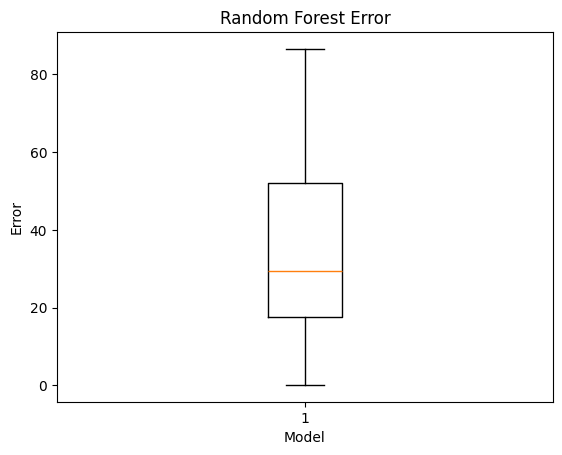

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.boxplot(rforest_error)
plt.title('Random Forest Error')
plt.xlabel('Model')
plt.ylabel('Error')
plt.show()
plt.clf()

In [ ]:
rforest_error.shape, lstm_error.shape, prophet_error.shape, sm_error.shape

((197,), (253,), (48,), (70,))

In [ ]:
lstm_error.describe()

count    253.000000
mean      12.051738
std       13.110813
min        0.004883
25%        3.564407
50%        7.970482
75%       14.664368
max       69.975128
dtype: float64